In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import csv
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from sklearn.impute import SimpleImputer

%matplotlib inline
import ipynb.fs.defs.functions as func

In [2]:
# register_matplotlib_converters()
np.random.seed(42)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Load the data and transform the format for easier manipulations

In [3]:
data = pd.read_csv('covtype.data', sep=",")
data.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33,y34,y35,y36,y37,y38,y39,y40,y41,y42,y43,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
data['class'] = data['Cover_Type'] - 1
data.drop(columns=['Cover_Type'], inplace=True)
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33,y34,y35,y36,y37,y38,y39,y40,y41,y42,y43,class
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4


## Some generic data exploratory analysis

In [5]:
# Top variables with missing values:
mv = {}
for var in data:
    mv[var] = data[var].isna().sum()

top_missing = sorted(mv.items(), key=operator.itemgetter(1), reverse=True)
if any([nb_missing for nb_missing in mv.values()]):
    print(top_missing)
else:
    print('No missing values in the whole dataset!')

No missing values in the whole dataset!


In [6]:
# Very informative...
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33,y34,y35,y36,y37,y38,y39,y40,y41,y42,y43,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,1.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
dtype: int64


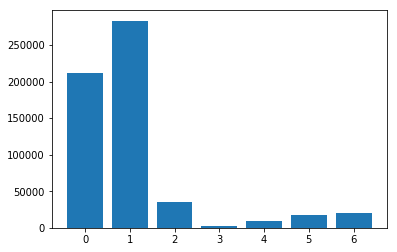

In [7]:
target_count = pd.value_counts(data['class'].values.flatten())
min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)
plt.bar(target_count.index, target_count.values)
print(target_count)

## Preprocessing
As each preprocessing step has to be numerically analized and reasoned about, for each preprocessing technique we will evaluate the preprocessing technique on several classifiers and decide if we want to keep the change or not based on the performance gain.

The performance will be evaluated on several classifiers including knn, naive bayes, xgboost, etc. If there was a performance gain after applying that preprocessing step, we will include that preprocessing step in our pipeline.

In [8]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb

In [9]:
def split(df, test_size=0.3):
    X = df.loc[:, ~df.columns.isin(['class'])]
    y = df.loc[:, df.columns.isin(['class'])]
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.flatten(), test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

In [10]:
def evaluate(df, split_dataset=split, knn=None, tree=None, rf=None, boost=None):
    def report(y_pred):
        return {
            'Accuracy': metrics.accuracy_score(y_test, y_pred),
#             'ROC AUC': metrics.roc_auc_score(y_test, y_pred),
#             'Confusion Matrix': metrics.confusion_matrix(y_test, y_pred),
            'Sensitivity': metrics.classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
        }
    
    X_train, X_test, y_train, y_test = split_dataset(df)
    res = {}
    
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    res['Naive Bayes'] = report(nb.predict(X_test))
    
    if knn is None:
        knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    res['KNN'] = report(knn.predict(X_test))
    
    if tree is None:
        tree = DecisionTreeClassifier(class_weight='balanced')
    tree.fit(X_train, y_train)
    res['Decision Tree'] = report(tree.predict(X_test))

    if rf is None:
        rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
    rf.fit(X_train, y_train)
    res['Random Forest'] = report(rf.predict(X_test))
    
    D_train = xgb.DMatrix(X_train, label=y_train)
    D_test = xgb.DMatrix(X_test, label=y_test)
    if boost is None:
        boost = xgb.train({'eta': 0.3, 'max_depth': 5, 'objective': 'multi:softprob', 'num_class': len(target_count)}, D_train, 10)
    preds = boost.predict(D_test)
    res['xgboost'] = report(np.asarray([np.argmax(line) for line in preds]))
    
    return res

evaluate(data)

{'Naive Bayes': {'Accuracy': 0.45714384064622726,
  'Sensitivity': 0.16102870307247466},
 'KNN': {'Accuracy': 0.9656577014870571, 'Sensitivity': 0.9729424763158513},
 'Decision Tree': {'Accuracy': 0.9321358087020378,
  'Sensitivity': 0.9448506076776605},
 'Random Forest': {'Accuracy': 0.9525025243253167,
  'Sensitivity': 0.9722019793601167},
 'xgboost': {'Accuracy': 0.7545036258490913,
  'Sensitivity': 0.8257833987634876}}

In [11]:
def show_progress(evaluations, labels, metric='Sensitivity'):
    methods = evaluations[0].keys()
    evaluations = [[results[metric] for method, results in evaluation.items()] for evaluation in evaluations]
    fig, ax = plt.subplots()
    ind = np.arange(len(evaluations[0]))
    width = 0.2
    
    p = [ax.bar(ind + i*width, height=evaluation, width=width, bottom=0) for i, evaluation in enumerate(evaluations)]
    
    ax.set_title(f'{metric} Scores')
    ax.set_xticks(ind + width / len(evaluations) * (len(evaluations) - 1))
    ax.set_xticklabels(methods)

    ax.legend(labels, loc='lower right', fancybox=True, shadow=True)
    ax.autoscale_view()

    plt.xticks(rotation=90)
    plt.show()

### 1. Standardization vs Normalization

In [12]:
standard = data.copy()
normal = data.copy()
for c in data.columns[0:10]:
    standard[c] = (data[c] - data[c].mean()) / data[c].std()
    normal[c]   = (data[c] - data[c].mean()) / (data[c].max() - data[c].min())
standard.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33,y34,y35,y36,y37,y38,y39,y40,y41,y42,y43,class
0,-1.297804,-0.935156,-1.482819,-0.053767,-0.796272,-1.180145,0.330743,0.439143,0.142960,3.246280,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
1,-1.319234,-0.890479,-1.616361,-0.270188,-0.899196,-1.257105,0.293388,0.590898,0.221341,3.205501,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
2,-0.554906,-0.148836,-0.681562,-0.006719,0.318742,0.532212,0.816363,0.742653,-0.196691,3.126963,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.622767,-0.005869,0.520322,-0.129044,1.227907,0.474492,0.965785,0.742653,-0.536343,3.194928,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,-1.301376,-0.988769,-1.616361,-0.547770,-0.813426,-1.256463,0.293388,0.540313,0.195214,3.165476,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4


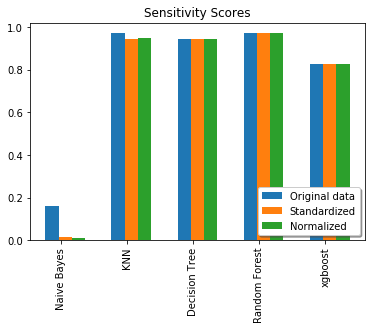

In [13]:
show_progress(evaluations=[evaluate(data), evaluate(standard), evaluate(normal)], 
              labels=['Original data', 'Standardized', 'Normalized'], 
              metric='Sensitivity')

* As we can see, there was no improvement after standardization and normalization so we will stick with the original data

### 2. Oversampling vs Undersampling

In [14]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.over_sampling import SMOTE, ADASYN

def oversampled_data_split(df, test_size=0.3):
    X = df.loc[:, ~df.columns.isin(['class'])]
    y = df.loc[:, df.columns.isin(['class'])]
    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.flatten(), test_size=0.3, random_state=42)
    X_train, y_train = SMOTE().fit_resample(X_train, y_train)
    return X_train, X_test, y_train, y_test

def oversampled_ADASYN_data_split(df, test_size=0.3):
    X = df.loc[:, ~df.columns.isin(['class'])]
    y = df.loc[:, df.columns.isin(['class'])]
    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.flatten(), test_size=0.3, random_state=42)
    X_train, y_train = ADASYN().fit_resample(X_train, y_train)
    return X_train, X_test, y_train, y_test


def undersampled_data_split(df, test_size=0.3):
    X = df.loc[:, ~df.columns.isin(['class'])]
    y = df.loc[:, df.columns.isin(['class'])]
    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.flatten(), test_size=0.3, random_state=42)
    X_train, y_train = RepeatedEditedNearestNeighbours().fit_resample(X_train, y_train)
    return X_train, X_test, y_train, y_test

Using TensorFlow backend.


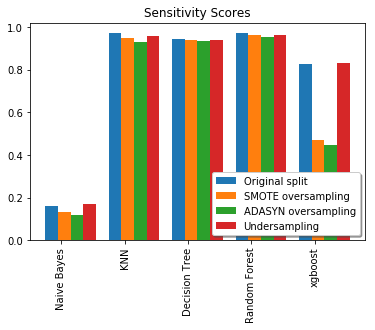

In [15]:
show_progress(evaluations=[evaluate(data), 
                           evaluate(data, split_dataset=oversampled_data_split), 
                           evaluate(data, split_dataset=oversampled_ADASYN_data_split), 
                           evaluate(data, split_dataset=undersampled_data_split),
                          ], 
              labels=['Original split', 'SMOTE oversampling', 'ADASYN oversampling', 'Undersampling'], 
              metric='Sensitivity')

* As we can see there isn't much difference between the original data split and undersampling
* While SMOTE and ADASYN oversampling methods decrease the performance
* So, we will stick with the original data

In [12]:
SPLIT_DATASET = split

### 3. Feature selection

In [15]:
def get_important_column_names(df, correlation_threshold=0, plot_correlations=False):
    columns = df.columns
    corr_matrix = df[columns].corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))  # Select upper triangle of correlation matrix
    to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
    to_keep = list(set(columns) - set(to_drop) | set(['class']))
    return to_keep
    

importants = get_important_column_names(data, correlation_threshold=0.4, plot_correlations=False)
importants = data[importants]
print(importants.shape)
importants.head()

(581012, 45)


,y27,Aspect,y26,y29,y10,class,y25,y22,y36,Horizontal_Distance_To_Roadways,y20,y43,y23,y21,Horizontal_Distance_To_Hydrology,y1,y19,y31,y24,y4,y7,y18,y6,y14,Horizontal_Distance_To_Fire_Points,y33,y12,y41,y8,y30,y38,y39,y17,y34,y40,Slope,y28,y5,y11,y15,Elevation,y16,y35,y37,y42
0,0,51,0,0,0,4,0,0,0,510,0,0,0,0,258,0,0,0,0,0,0,0,0,0,6279,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,2596,0,0,0,0
1,0,56,0,0,0,4,0,0,0,390,0,0,0,0,212,0,0,0,0,0,0,0,0,0,6225,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2590,0,0,0,0
2,0,139,0,0,0,1,0,0,0,3180,0,0,0,0,268,0,0,0,0,0,0,0,0,0,6121,0,0,0,0,0,0,0,0,0,0,9,0,0,0,1,2804,0,0,0,0
3,0,155,0,0,0,1,0,0,0,3090,0,0,0,0,242,0,0,0,0,0,0,0,0,0,6211,1,0,0,0,0,0,0,0,0,0,18,0,0,0,0,2785,0,0,0,0
4,0,45,0,0,0,4,0,0,0,391,0,0,0,0,153,0,0,0,0,0,0,0,0,0,6172,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2595,0,0,0,0


In [16]:
def multiline_measure_line_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False, plot_legend=True):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if percentage:
        ax.set_ylim(0.0, 1.0)

    legend = []
    colors = {}
    for name, y in yvalues.items():
        [method, measure] = name.split('-')
        style = ':' if measure == 'Sensitivity' else '-'
        c = colors.get(method, None)
        p = ax.plot(xvalues, y, linestyle=style, c=c)
        colors[method] = p[-1].get_color()
        legend.append(name)
    
    if plot_legend:
        ax.legend(legend, loc='lower left', fancybox=True, shadow=True)    
    

In [17]:
def evaluate_threshold_performance(df, correlation_thresholds, get_importants=get_important_column_names,
                                   title='Performance of different classifiers', xlabel='Correlation Threshold'):
    performance = {}

    for threshold in tqdm(correlation_thresholds):
        importants = get_importants(data, correlation_threshold=threshold, plot_correlations=False)
        importants = df[importants]

        res = evaluate(importants, split_dataset=SPLIT_DATASET)
        for method, measures in res.items():
            for measure, value in measures.items():
                if measure not in {'Accuracy', 'Sensitivity'}:
                    continue
                name = f'{method}-{measure}'
                if name not in performance:
                    performance[name] = []
                performance[name].append(value)

    plt.figure(figsize=(12, 6))
    plt.xticks(correlation_thresholds)
    multiline_measure_line_chart(plt.gca(), correlation_thresholds, performance, title=title, xlabel=xlabel, ylabel='')


/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


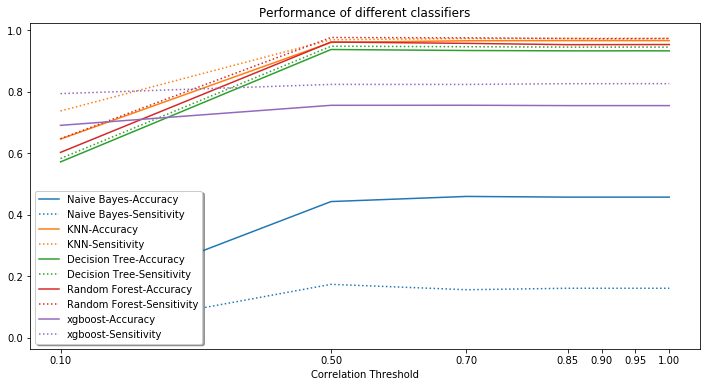

In [30]:
evaluate_threshold_performance(data, 
                               correlation_thresholds=[0.1, 0.5, 0.7, 0.85, 0.9, 0.95, 1.,], 
                               get_importants=get_important_column_names)

* As we can see including all the variables is the best so we won't remove any

## Feature analysis
As we don't know much about the variables let's select some important ones and do exploratory analysis on them.
We will select the most important features based on the decision tree classifier and do some analysis on those.

In [31]:
import operator
def get_decision_importants(df, nb_importants=6):
    X_train, X_test, y_train, y_test = SPLIT_DATASET(df)
    tree = DecisionTreeClassifier(class_weight='balanced')
    tree.fit(X_train, y_train)
    col2importance = dict(zip(df.columns, tree.feature_importances_))
    best = sorted(col2importance.items(), key=operator.itemgetter(1), reverse=True)[:nb_importants]

    return [name for name, score in best]

importants = get_decision_importants(data, nb_importants=8)
importants = data[importants]

In [32]:
importants

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Hillshade_9am,Vertical_Distance_To_Hydrology,Aspect,Hillshade_Noon
0,2596,510,6279,258,221,0,51,232
1,2590,390,6225,212,220,-6,56,235
2,2804,3180,6121,268,234,65,139,238
3,2785,3090,6211,242,238,118,155,238
4,2595,391,6172,153,220,-1,45,234
...,...,...,...,...,...,...,...,...
581007,2396,108,837,85,240,17,153,237
581008,2391,95,845,67,240,12,152,237
581009,2386,90,854,60,236,7,159,241
581010,2384,90,864,60,230,5,170,245


<Figure size 432x288 with 0 Axes>

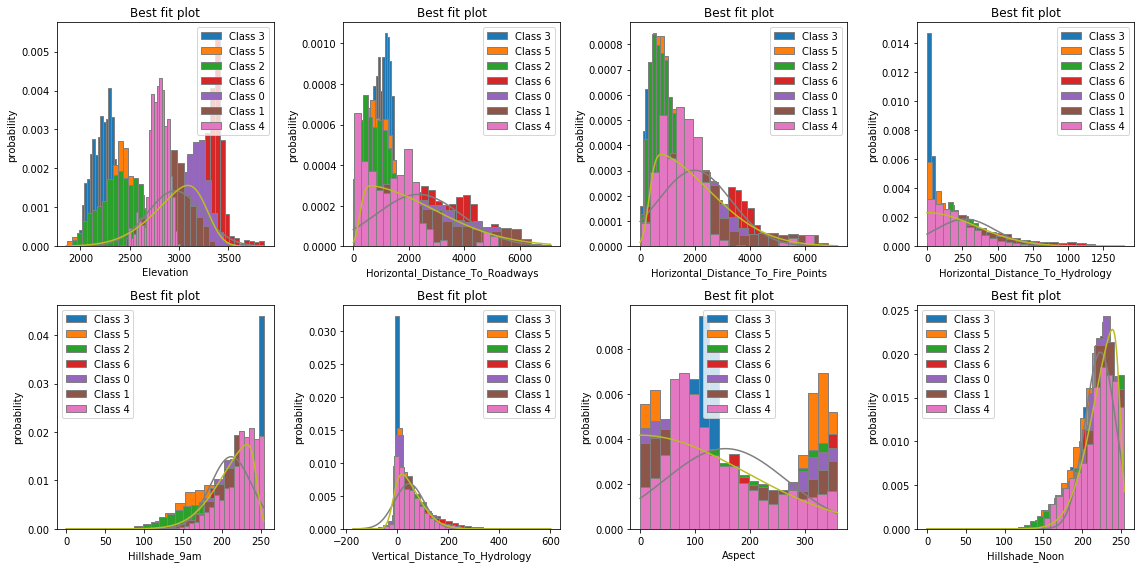

In [33]:
import scipy.stats as _stats 
def compute_known_distributions(x_values, n_bins) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # LogNorm
#     sigma, loc, scale = _stats.lognorm.fit(x_values)
#     distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    # Exponential
#     loc, scale = _stats.expon.fit(x_values)
#     distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # SkewNorm
    a, loc, scale = _stats.skewnorm.fit(x_values)
    distributions['SkewNorm(%.2f)'%a] = _stats.skewnorm.pdf(x_values, a, loc, scale) 
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, labels: pd.Series, var: str):
    classes = labels.unique()[::-1]
    for c in classes:
        values = pd.Series([s for s, l in zip(series, labels) if l == c])
        values = values.sort_values().values
        n, bins, patches = ax.hist(values, 20, density=True, edgecolor='grey', label=f'Class {c}')
    values = series.sort_values().values
    distributions = compute_known_distributions(values, bins)
    func.multiple_line_chart(ax, values, distributions, 'Best fit plot', var, 'probability', plot_legend=False)
    ax.legend()

columns = importants.select_dtypes(include='number').columns
rows, cols = func.choose_grid(len(columns) - 1)
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    histogram_with_distributions(axs[i, j], data[columns[n]].dropna(), data['class'], columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

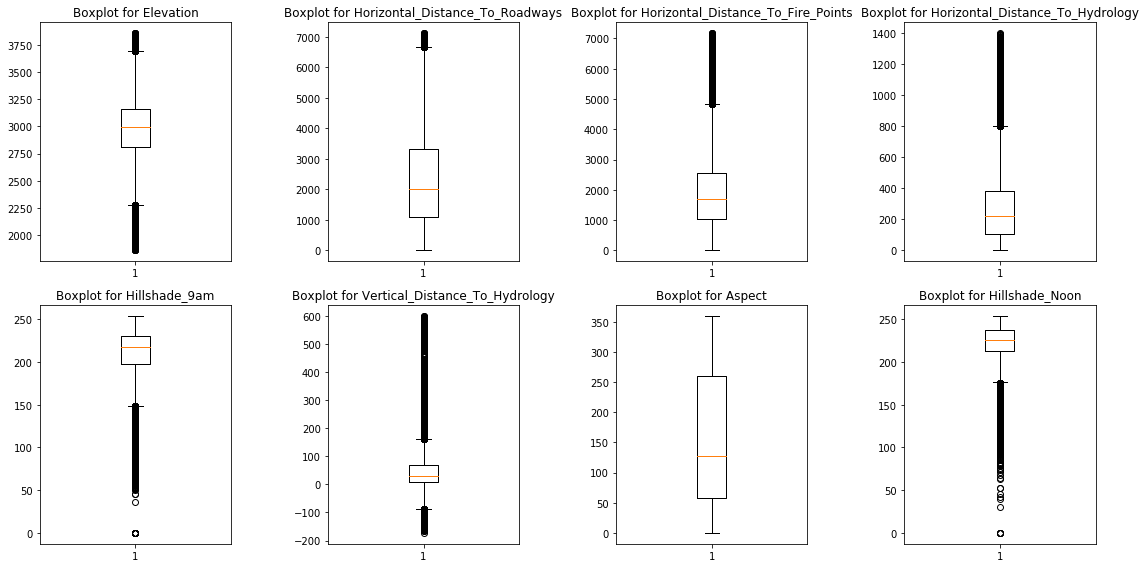

In [34]:
columns = importants.select_dtypes(include='number').columns
rows, cols = func.choose_grid(len(columns) - 1)
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Boxplot for %s'%columns[n])
    axs[i, j].boxplot(data[columns[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

## Multi-Variate Analysis
##### Again, as the dataset is too large in terms of the number of columns, we will concentrate on the variables that are important based the previous findings

<Figure size 432x288 with 0 Axes>

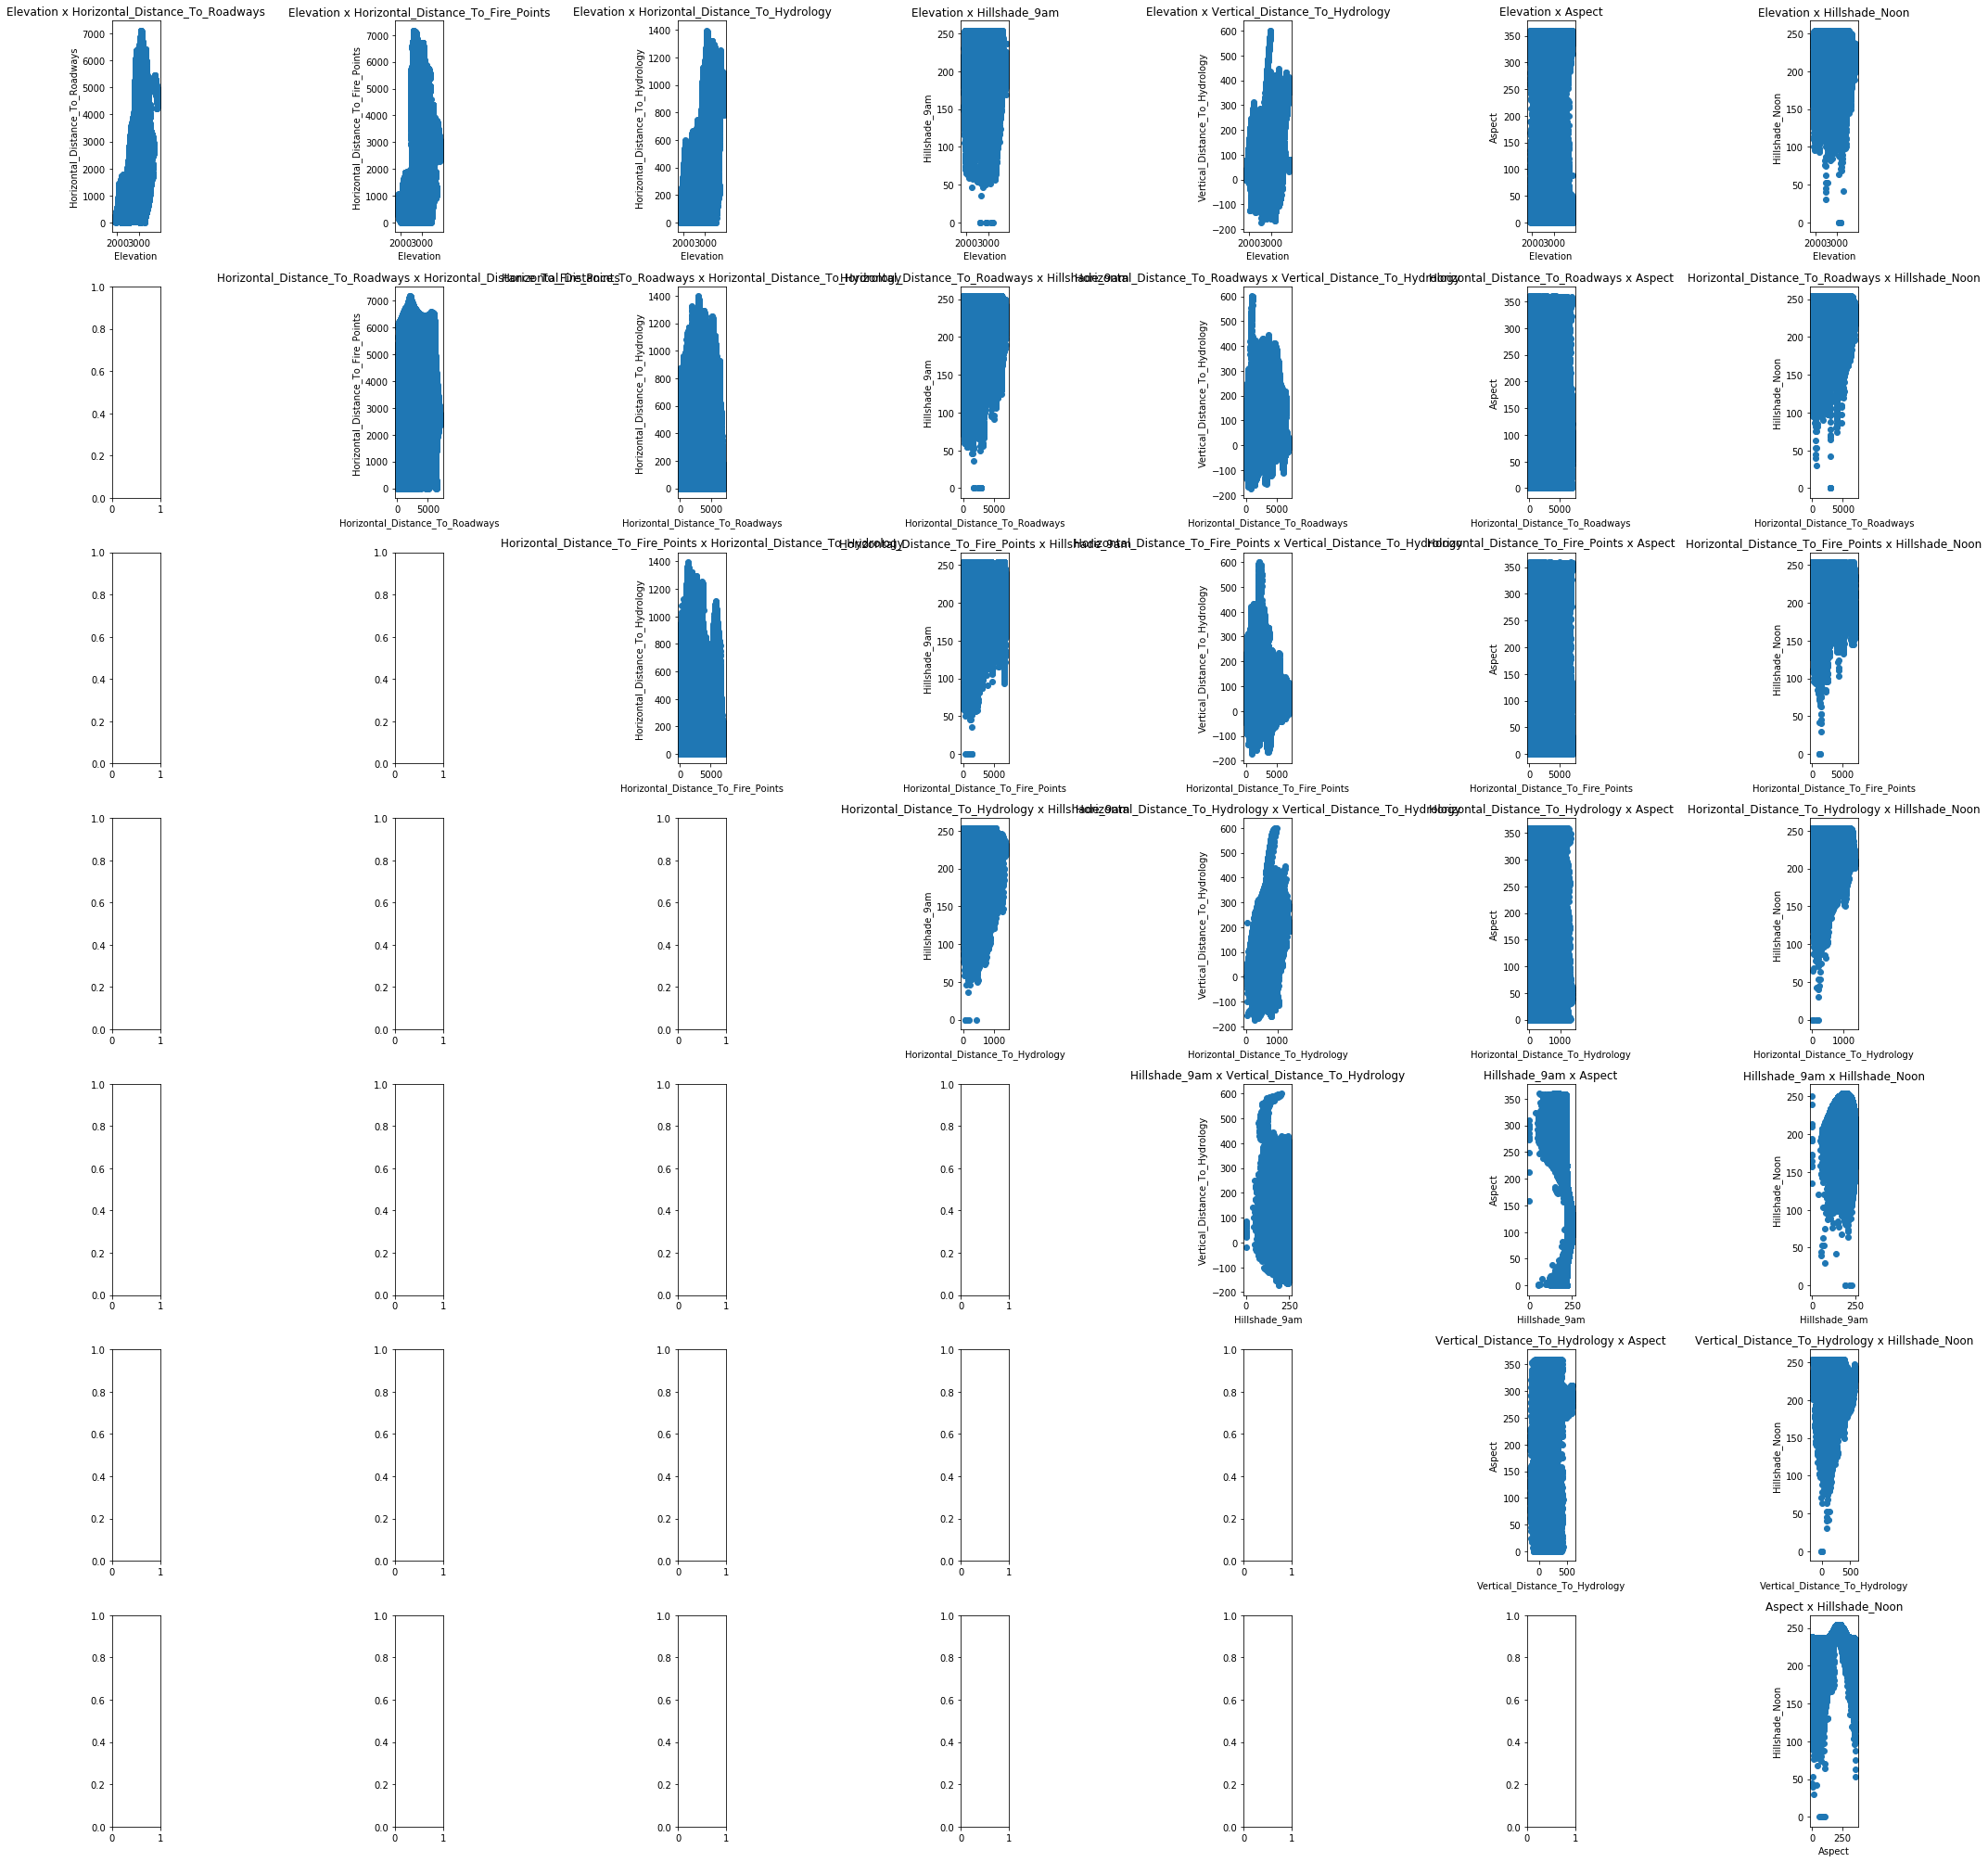

In [35]:
columns = importants.select_dtypes(include='number').columns

rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
fig.tight_layout()
plt.show()

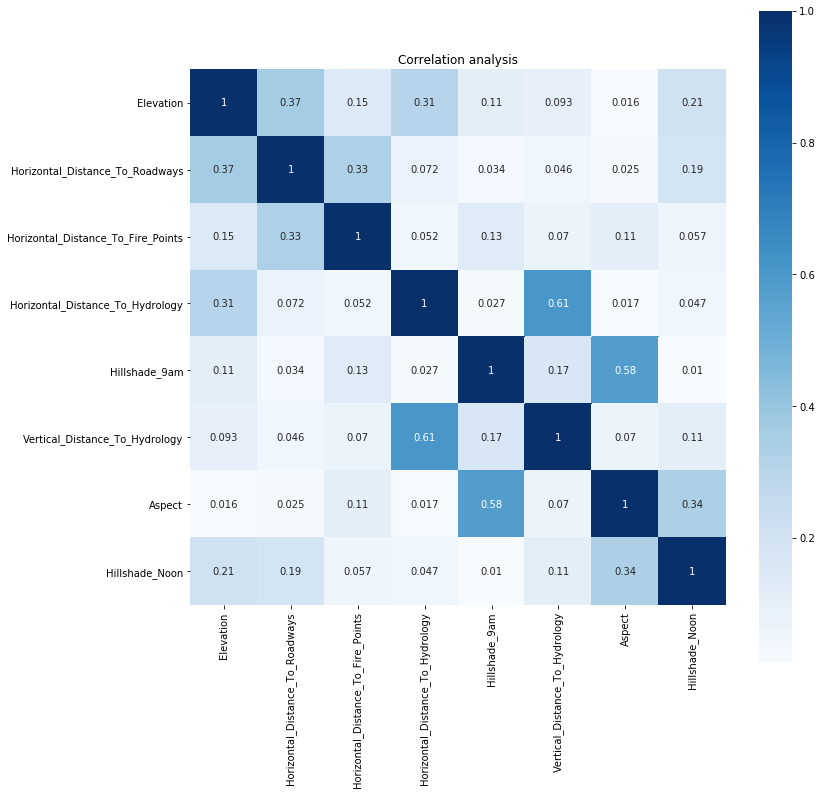

In [39]:
fig = plt.figure(figsize=[12, 12])
corr_mtx = importants.corr().abs()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues', square=True)
plt.title('Correlation analysis')
plt.show()

## Classification

In [40]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.utils.class_weight import compute_class_weight

In [41]:
X_train, X_test, y_train, y_test = SPLIT_DATASET(data)
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
print('Class weights:', class_weight)

Class weights: [ 0.39182341  0.29311     2.31331195 29.76492974  8.8676958   4.7859261
  4.02334623]


### 1. Naive bayes

In [43]:
EVALUATION_METRIC = 'Sensitivity'

              precision    recall  f1-score   support

           0       0.65      0.48      0.55     63556
           1       0.65      0.76      0.70     85078
           2       0.60      0.87      0.71     10638
           3       0.58      0.38      0.46       795
           4       0.21      0.06      0.09      2941
           5       0.23      0.23      0.23      5227
           6       0.63      0.61      0.62      6069

    accuracy                           0.63    174304
   macro avg       0.51      0.48      0.48    174304
weighted avg       0.63      0.63      0.62    174304

Accuracy: 0.629670001835873
Sensitivity: 0.7612896400949717


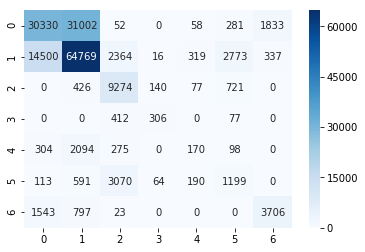

In [42]:
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# print('ROC AUC:', metrics.roc_auc_score(y_test, y_pred))
print('Sensitivity:', metrics.classification_report(y_test, y_pred, output_dict=True)['1']['recall'])
cnf_mtx = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_mtx, annot=True, cmap='Blues', fmt='g')

### 2. KNN

[d=manhattan] Best acc: 0.9675165228566184, with nvalues: 3
[d=manhattan] Best sensitivity: 0.9735419262323985, with nvalues: 5
---------------------------
[d=chebyshev] Best acc: 0.9630587938314669, with nvalues: 3
[d=chebyshev] Best sensitivity: 0.9704623992101366, with nvalues: 3
---------------------------
[d=minkowski] Best acc: 0.9663805764641087, with nvalues: 3
[d=minkowski] Best sensitivity: 0.9729424763158513, with nvalues: 5
---------------------------
Obtained best Sensitivity: 0.9735419262323985 - with params: {'n_neighbors': 5, 'metric': 'manhattan'}


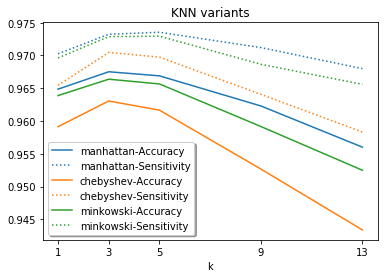

In [48]:
from sklearn.neighbors import KNeighborsClassifier

nvalues = [1, 3, 5, 9, 13]
dist = ['manhattan', 'chebyshev', 'minkowski']
best = (-1, {})

performance = {}
for d in dist:
    performance[f'{d}-Accuracy'], performance[f'{d}-Sensitivity'] = [], []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        performance[f'{d}-Accuracy'].append(metrics.accuracy_score(y_test, y_pred))
#         performance[f'{d}-ROC AUC'].append(metrics.roc_auc_score(y_test, y_pred))
        performance[f'{d}-Sensitivity'].append(metrics.classification_report(y_test, y_pred, output_dict=True)['1']['recall'])
        if best[0] < performance[f'{d}-{EVALUATION_METRIC}'][-1]:
            best = (performance[f'{d}-{EVALUATION_METRIC}'][-1], {'n_neighbors': n, 'metric': d})
    acc = performance[f'{d}-Accuracy']
#     auc = performance[f'{d}-ROC AUC']
    sens = performance[f'{d}-Sensitivity']
    print(f'[d={d}] Best acc: {max(acc)}, with nvalues: {nvalues[np.argmax(acc)]}')
#     print(f'[d={d}] Best auc: {max(auc)}, with nvalues: {nvalues[np.argmax(auc)]}')
    print(f'[d={d}] Best sensitivity: {max(sens)}, with nvalues: {nvalues[np.argmax(sens)]}')
    print('---------------------------')

knn_best = best
print(f'Obtained best {EVALUATION_METRIC}: {best[0]} - with params: {best[1]}')

plt.figure()
plt.xticks(nvalues)
multiline_measure_line_chart(plt.gca(), nvalues, performance, title='KNN variants', xlabel='k', ylabel='')
plt.show()

## 3. Decision Tree

Min samples leaf: [0.001 0.026 0.051 0.076 0.101 0.126 0.151 0.176]


/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predic

[criterion=entropy, d=3] Best acc: 0.41257228749770514, with min_samples_leaf: 0.001
[criterion=entropy, d=3] Best sensitivity: 0.30561367215966523, with min_samples_leaf: 0.001
---------------------------


/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predic

[criterion=entropy, d=7] Best acc: 0.587806361299798, with min_samples_leaf: 0.001
[criterion=entropy, d=7] Best sensitivity: 0.5283269470368368, with min_samples_leaf: 0.001
---------------------------


/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predic

[criterion=entropy, d=15] Best acc: 0.6632033688268771, with min_samples_leaf: 0.001
[criterion=entropy, d=15] Best sensitivity: 0.6022238416511907, with min_samples_leaf: 0.001
---------------------------


/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predic

[criterion=gini, d=3] Best acc: 0.3274566275013769, with min_samples_leaf: 0.001
[criterion=gini, d=3] Best sensitivity: 0.054949575683490445, with min_samples_leaf: 0.001
---------------------------


/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predic

[criterion=gini, d=7] Best acc: 0.5635097301266753, with min_samples_leaf: 0.001
[criterion=gini, d=7] Best sensitivity: 0.4685700181010367, with min_samples_leaf: 0.026
---------------------------


/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predic

[criterion=gini, d=15] Best acc: 0.6657219570405728, with min_samples_leaf: 0.001
[criterion=gini, d=15] Best sensitivity: 0.6107571875220386, with min_samples_leaf: 0.001
---------------------------
Obtained best Sensitivity: 0.6107571875220386 - with params: {'min_samples_leaf': 0.001, 'max_depth': 15, 'criterion': 'gini', 'class_weight': 'balanced'}


/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 432x288 with 0 Axes>

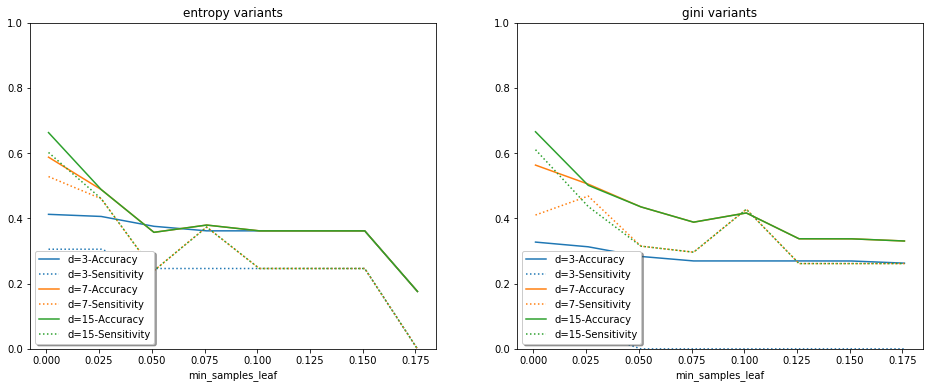

In [49]:
min_samples_leaf = np.array(range(1, 200, 25)) / 1000.
print('Min samples leaf:', min_samples_leaf)
max_depths = [3, 7, 15]
criteria = ['entropy', 'gini']
best = (-1, {})

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 6), squeeze=False)
for k, f in enumerate(criteria):
    performance = {}
    for d in max_depths:
        performance[f'd={d}-Accuracy'], performance[f'd={d}-Sensitivity'] = [], []
        for n in min_samples_leaf:
            tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f, class_weight='balanced')
            tree.fit(X_train, y_train)
            y_pred = tree.predict(X_test)
            performance[f'd={d}-Accuracy'].append(metrics.accuracy_score(y_test, y_pred))
#             performance[f'd={d}-ROC AUC'].append(metrics.roc_auc_score(y_test, y_pred))
            performance[f'd={d}-Sensitivity'].append(metrics.classification_report(y_test, y_pred, output_dict=True)['1']['recall'])
            if best[0] < performance[f'd={d}-{EVALUATION_METRIC}'][-1]:
                best = (performance[f'd={d}-{EVALUATION_METRIC}'][-1], {'min_samples_leaf': n, 'max_depth': d, 'criterion': f, 'class_weight': 'balanced'})

        acc = performance[f'd={d}-Accuracy']
#         auc = performance[f'd={d}-ROC AUC']
        sens = performance[f'd={d}-Sensitivity']
            
        print(f'[criterion={f}, d={d}] Best acc: {max(acc)}, with min_samples_leaf: {min_samples_leaf[np.argmax(acc)]}')
#         print(f'[criterion={f}, d={d}] Best auc: {max(auc)}, with min_samples_leaf: {min_samples_leaf[np.argmax(auc)]}')
        print(f'[criterion={f}, d={d}] Best sensitivity: {max(sens)}, with min_samples_leaf: {min_samples_leaf[np.argmax(sens)]}')
        print('---------------------------')
    multiline_measure_line_chart(axs[0, k], min_samples_leaf, performance, title=f'{f} variants', xlabel='min_samples_leaf', ylabel='', percentage=True)
    
decision_best = best
print(f'Obtained best {EVALUATION_METRIC}: {best[0]} - with params: {best[1]}')
plt.show()

## 4. Random Forest

[max_features=0, d=3] Best acc: 0.44194051771617404, with n_estimators: 100
[max_features=sqrt, d=3] Best sensitivity: 0.3813441782834575, with n_estimators: 10
---------------------------
[max_features=0, d=7] Best acc: 0.5729530016522857, with n_estimators: 50
[max_features=sqrt, d=7] Best sensitivity: 0.44937586685159503, with n_estimators: 10
---------------------------
[max_features=0, d=15] Best acc: 0.8076005140444281, with n_estimators: 50
[max_features=sqrt, d=15] Best sensitivity: 0.7573638308375843, with n_estimators: 10
---------------------------
[max_features=1, d=3] Best acc: 0.46094753993023685, with n_estimators: 150
[max_features=log2, d=3] Best sensitivity: 0.4792190695596982, with n_estimators: 5
---------------------------
[max_features=1, d=7] Best acc: 0.5670552597760234, with n_estimators: 200
[max_features=log2, d=7] Best sensitivity: 0.572439408542749, with n_estimators: 5
---------------------------
[max_features=1, d=15] Best acc: 0.8032862125940885, with n_

<Figure size 432x288 with 0 Axes>

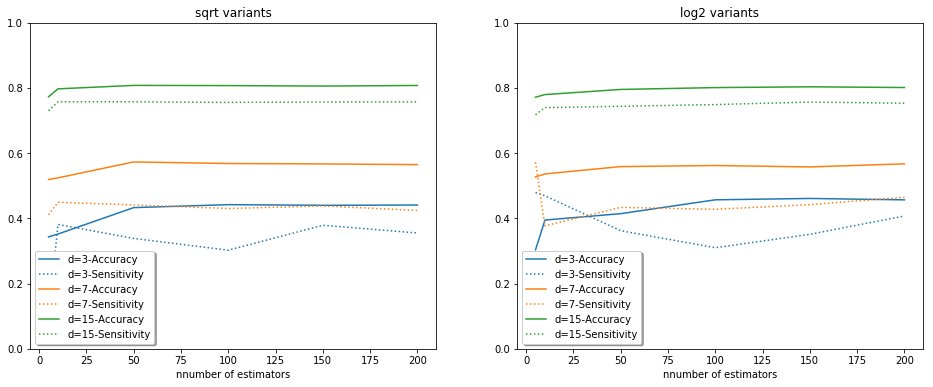

In [50]:
n_estimators = [5, 10, 50, 100, 150, 200]
max_depths = [3, 7, 15]
max_features = ['sqrt', 'log2']
best = (-1, {})

plt.figure()
fig, axs = plt.subplots(1, len(max_features), figsize=(16, 6), squeeze=False)
for k, f in enumerate(max_features):
    performance = {}

    for d in max_depths:
        performance[f'd={d}-Accuracy'], performance[f'd={d}-Sensitivity'] = [], []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f, class_weight='balanced')
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            performance[f'd={d}-Accuracy'].append(metrics.accuracy_score(y_test, y_pred))
#             performance[f'd={d}-ROC AUC'].append(metrics.roc_auc_score(y_test, y_pred))
            performance[f'd={d}-Sensitivity'].append(metrics.classification_report(y_test, y_pred, output_dict=True)['1']['recall'])
            if best[0] < performance[f'd={d}-{EVALUATION_METRIC}'][-1]:
                best = (performance[f'd={d}-{EVALUATION_METRIC}'][-1], {'n_estimators': n, 'max_depth': d, 'max_features': f, 'class_weight': 'balanced'})

        acc = performance[f'd={d}-Accuracy']
#         auc = performance[f'd={d}-ROC AUC']
        sens = performance[f'd={d}-Sensitivity']
            
        print(f'[max_features={k}, d={d}] Best acc: {max(acc)}, with n_estimators: {n_estimators[np.argmax(acc)]}')
#         print(f'[max_features={f}, d={d}] Best auc: {max(auc)}, with n_estimators: {n_estimators[np.argmax(auc)]}')
        print(f'[max_features={f}, d={d}] Best sensitivity: {max(sens)}, with n_estimators: {n_estimators[np.argmax(sens)]}')
        print('---------------------------')

    multiline_measure_line_chart(axs[0, k], n_estimators, performance, title=f'{f} variants', xlabel='nnumber of estimators', ylabel='', percentage=True)
    
random_best = best
print(f'Obtained best {EVALUATION_METRIC}: {best[0]} - with params: {best[1]}')
plt.show()

## 5. xgboost

In [51]:
import xgboost as xgb

D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[d=3] Best acc: 0.760470212961263, with nvalues: 55
[d=3] Best sensitivity: 0.8261477702813889, with nb_steps: 55
---------------------------
[d=7] Best acc: 0.8583337158068661, with nvalues: 55
[d=7] Best sensitivity: 0.8906415289499048, with nb_steps: 55
---------------------------
[d=15] Best acc: 0.9650151459519001, with nvalues: 55
[d=15] Best sensitivity: 0.9755988622205506, with nb_steps: 55
---------------------------
Obtained best Sensitivity: 0.9755988622205506 - with params: {'num_boost_round': 55, 'params': {'eta': 0.3, 'max_depth': 15, 'objective': 'multi:softprob', 'num_class': 7}}


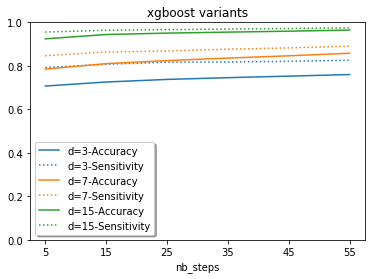

In [53]:
nb_steps = list(range(5, 56, 10))
max_depths = [3, 7, 15]
best = (-1, {})

performance = {}
for d in max_depths:
    performance[f'd={d}-Accuracy'], performance[f'd={d}-Sensitivity'] = [], []
    for n in nb_steps:
        param = {
            'eta': 0.3, 
            'max_depth': d,  
            'objective': 'multi:softprob',  
            'num_class': len(target_count)
        } 
        model = xgb.train(param, D_train, n)
        preds = model.predict(D_test)
        y_pred = np.asarray([np.argmax(line) for line in preds])

        performance[f'd={d}-Accuracy'].append(metrics.accuracy_score(y_test, y_pred))
#         performance[f'd={d}-ROC AUC'].append(metrics.roc_auc_score(y_test, y_pred))
        performance[f'd={d}-Sensitivity'].append(metrics.classification_report(y_test, y_pred, output_dict=True)['1']['recall'])
        if best[0] < performance[f'd={d}-{EVALUATION_METRIC}'][-1]:
            best = (performance[f'd={d}-{EVALUATION_METRIC}'][-1], {'num_boost_round': n, 'params': param})

    acc = performance[f'd={d}-Accuracy']
#     auc = performance[f'd={d}-ROC AUC']
    sens = performance[f'd={d}-Sensitivity']
    print(f'[d={d}] Best acc: {max(acc)}, with nb_steps: {nb_steps[np.argmax(acc)]}')
#     print(f'[d={d}] Best auc: {max(auc)}, with nb_steps: {nb_steps[np.argmax(auc)]}')
    print(f'[d={d}] Best sensitivity: {max(sens)}, with nb_steps: {nb_steps[np.argmax(sens)]}')
    print('---------------------------')

xg_best = best
print(f'Obtained best {EVALUATION_METRIC}: {best[0]} - with params: {best[1]}')
plt.figure()
plt.xticks(nb_steps)
multiline_measure_line_chart(plt.gca(), nb_steps, performance, title='xgboost variants', xlabel='nb_steps', ylabel='', percentage=True)
plt.show()

## Comparison between the best models

{'Decision Tree': {'Accuracy': 0.6657219570405728,
                   'Sensitivity': 0.6107571875220386},
 'KNN': {'Accuracy': 0.9668911786304387, 'Sensitivity': 0.9735419262323985},
 'Naive Bayes': {'Accuracy': 0.45714384064622726,
                 'Sensitivity': 0.16102870307247466},
 'Random Forest': {'Accuracy': 0.7964992197539931,
                   'Sensitivity': 0.7502174475187475},
 'xgboost': {'Accuracy': 0.9650151459519001, 'Sensitivity': 0.9755988622205506}}


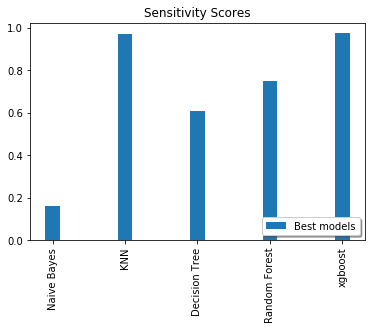

In [54]:
from pprint import pprint

boost = xgb.train(dtrain=D_train, **xg_best[1])
res = evaluate(data, split_dataset=SPLIT_DATASET, 
         knn=KNeighborsClassifier(**knn_best[1]), 
         tree=DecisionTreeClassifier(**decision_best[1]), 
         rf=RandomForestClassifier(**random_best[1]), 
         boost=boost)

pprint(res)
show_progress(evaluations=[res], labels=['Best models'], metric=EVALUATION_METRIC)

In [ ]:
show_progress(
    evaluations=[res], 
    labels=['Best models'], 
    metric='Accuracy'
)

* As we can see, the KNN model with params: {'n_neighbors': 5, 'metric': 'manhattan'} and xgboost have comparably very similar results and outperform all the other models

## Association Rules

In [13]:
from mlxtend.frequent_patterns import apriori, association_rules

### pd.cut

In [19]:
# pd.cut
selected_columns = data.columns
selected_columns = set(selected_columns)
selected_columns.remove('class')

newdf = data[selected_columns].copy()
for col in newdf:
    if not col.startswith('y'): 
        newdf[col] = pd.cut(newdf[col],3,labels=['0','1','2'])
newdf.head(5)

,y27,y32,Aspect,Vertical_Distance_To_Hydrology,y3,y26,y29,y9,y10,y25,y22,y36,Horizontal_Distance_To_Roadways,y20,y43,y23,y21,Horizontal_Distance_To_Hydrology,y1,Hillshade_3pm,y19,y31,y24,y4,y7,y18,y6,y14,Horizontal_Distance_To_Fire_Points,y33,y12,y41,y8,y30,y38,y39,y17,y34,y40,Slope,y28,y5,Hillshade_Noon,y11,y15,y0,Elevation,y13,y16,y35,Hillshade_9am,y37,y42,y2
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,0,0,0,2,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,0,0,0,2,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,1,0,0,0,2,0,0,0
3,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,0,0,0,2,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,0,0,0,2,0,0,0


In [24]:
dummylist = []
for att in newdf:
    if att.startswith('y'):
        dummylist.append(newdf[[att]])
    else:
        dummylist.append(pd.get_dummies(newdf[[att]]))
dummified_df = pd.concat(dummylist, axis=1)
dummified_df.head(5)

,y27,y32,Aspect_0,Aspect_1,Aspect_2,Vertical_Distance_To_Hydrology_0,Vertical_Distance_To_Hydrology_1,Vertical_Distance_To_Hydrology_2,y3,y26,y29,y9,y10,y25,y22,y36,Horizontal_Distance_To_Roadways_0,Horizontal_Distance_To_Roadways_1,Horizontal_Distance_To_Roadways_2,y20,y43,y23,y21,Horizontal_Distance_To_Hydrology_0,Horizontal_Distance_To_Hydrology_1,Horizontal_Distance_To_Hydrology_2,y1,Hillshade_3pm_0,Hillshade_3pm_1,Hillshade_3pm_2,y19,y31,y24,y4,y7,y18,y6,y14,Horizontal_Distance_To_Fire_Points_0,Horizontal_Distance_To_Fire_Points_1,Horizontal_Distance_To_Fire_Points_2,y33,y12,y41,y8,y30,y38,y39,y17,y34,y40,Slope_0,Slope_1,Slope_2,y28,y5,Hillshade_Noon_0,Hillshade_Noon_1,Hillshade_Noon_2,y11,y15,y0,Elevation_0,Elevation_1,Elevation_2,y13,y16,y35,Hillshade_9am_0,Hillshade_9am_1,Hillshade_9am_2,y37,y42,y2
0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0


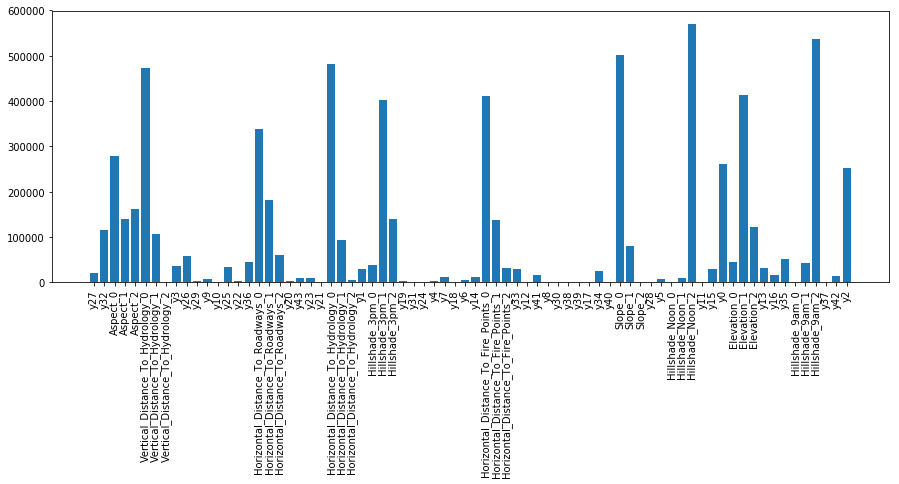

In [25]:
mp = {}
for col in list(dummified_df): mp[col] = (dummified_df[col] == 1).sum()
keys = list(mp.keys())
freqs = list(mp.values())
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(freqs)), freqs)
_ = plt.xticks(np.arange(len(freqs)), keys, rotation='vertical')

Min support: 0.5390604058195451


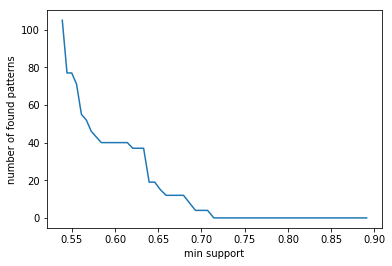

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
149,"(Vertical_Distance_To_Hydrology_0, Hillshade_N...",(Slope_0),0.725806,0.862566,0.652179,0.898559,1.041728,0.026124,1.354816,3
150,"(Vertical_Distance_To_Hydrology_0, Hillshade_N...",(Horizontal_Distance_To_Hydrology_0),0.726264,0.828651,0.652179,0.897992,1.083680,0.050360,1.679768,3
151,"(Vertical_Distance_To_Hydrology_0, Horizontal_...",(Hillshade_Noon_2),0.652179,0.982918,0.652179,1.000000,1.017379,0.011141,inf,3
152,"(Hillshade_Noon_2, Horizontal_Distance_To_Hydr...",(Vertical_Distance_To_Hydrology_0),0.706738,0.814138,0.652179,0.922803,1.133472,0.076797,2.407621,3
159,"(Hillshade_9am_2, Vertical_Distance_To_Hydrolo...",(Slope_0),0.691941,0.862566,0.636474,0.919839,1.066398,0.039629,1.714469,3
...,...,...,...,...,...,...,...,...,...,...
338,"(Hillshade_9am_2, Hillshade_3pm_1, Horizontal_...","(Hillshade_Noon_2, Slope_0)",0.567887,0.862566,0.540514,0.951799,1.103451,0.050674,2.851253,3
339,"(Hillshade_9am_2, Hillshade_3pm_1, Slope_0)","(Hillshade_Noon_2, Horizontal_Distance_To_Hydr...",0.653226,0.812701,0.540514,0.827453,1.018152,0.009637,1.085498,3
340,"(Hillshade_3pm_1, Hillshade_Noon_2, Horizontal...","(Hillshade_9am_2, Slope_0)",0.570277,0.838606,0.540514,0.947809,1.130220,0.062276,3.092352,3
341,"(Hillshade_3pm_1, Hillshade_Noon_2, Slope_0)","(Hillshade_9am_2, Horizontal_Distance_To_Hydro...",0.653425,0.764113,0.540514,0.827200,1.082563,0.041223,1.365089,3


In [27]:
minpatterns = 100
min_support = 0.9
assoc = {}

while min_support > 0:
    min_support *= 0.99

    frequent_itemsets = apriori(dummified_df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
    rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
    res = rules[(rules['antecedent_len']>=3)]
    assoc[min_support] = len(res)
    if len(res) >= minpatterns:
        break

print(f'Min support: {min_support}')
plt.figure()
plt.plot(assoc.keys(), assoc.values())
plt.xlabel('min support')
plt.ylabel('number of found patterns')
plt.show()
res

### pd.qcut

In [28]:
selected_columns = data.columns
selected_columns = set(selected_columns)
selected_columns.remove('class')

newdf = data[selected_columns].copy()
for col in newdf:
    if not col.startswith('y'): 
        newdf[col] = pd.qcut(newdf[col].rank(method='first'),3,labels=['0','1','2'], duplicates='drop')
newdf.head(5)

,y27,y32,Aspect,Vertical_Distance_To_Hydrology,y3,y26,y29,y9,y10,y25,y22,y36,Horizontal_Distance_To_Roadways,y20,y43,y23,y21,Horizontal_Distance_To_Hydrology,y1,Hillshade_3pm,y19,y31,y24,y4,y7,y18,y6,y14,Horizontal_Distance_To_Fire_Points,y33,y12,y41,y8,y30,y38,y39,y17,y34,y40,Slope,y28,y5,Hillshade_Noon,y11,y15,y0,Elevation,y13,y16,y35,Hillshade_9am,y37,y42,y2
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,1,0,0,0
2,0,0,1,2,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,2,0,0,0
3,0,0,1,2,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,1,0,0,0,0,2,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,1,0,0,0


In [29]:
dummylist = []
for att in newdf:
    if att.startswith('y'):
        dummylist.append(newdf[[att]])
    else:
        dummylist.append(pd.get_dummies(newdf[[att]]))
dummified_df = pd.concat(dummylist, axis=1)
dummified_df.head(5)

,y27,y32,Aspect_0,Aspect_1,Aspect_2,Vertical_Distance_To_Hydrology_0,Vertical_Distance_To_Hydrology_1,Vertical_Distance_To_Hydrology_2,y3,y26,y29,y9,y10,y25,y22,y36,Horizontal_Distance_To_Roadways_0,Horizontal_Distance_To_Roadways_1,Horizontal_Distance_To_Roadways_2,y20,y43,y23,y21,Horizontal_Distance_To_Hydrology_0,Horizontal_Distance_To_Hydrology_1,Horizontal_Distance_To_Hydrology_2,y1,Hillshade_3pm_0,Hillshade_3pm_1,Hillshade_3pm_2,y19,y31,y24,y4,y7,y18,y6,y14,Horizontal_Distance_To_Fire_Points_0,Horizontal_Distance_To_Fire_Points_1,Horizontal_Distance_To_Fire_Points_2,y33,y12,y41,y8,y30,y38,y39,y17,y34,y40,Slope_0,Slope_1,Slope_2,y28,y5,Hillshade_Noon_0,Hillshade_Noon_1,Hillshade_Noon_2,y11,y15,y0,Elevation_0,Elevation_1,Elevation_2,y13,y16,y35,Hillshade_9am_0,Hillshade_9am_1,Hillshade_9am_2,y37,y42,y2
0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0


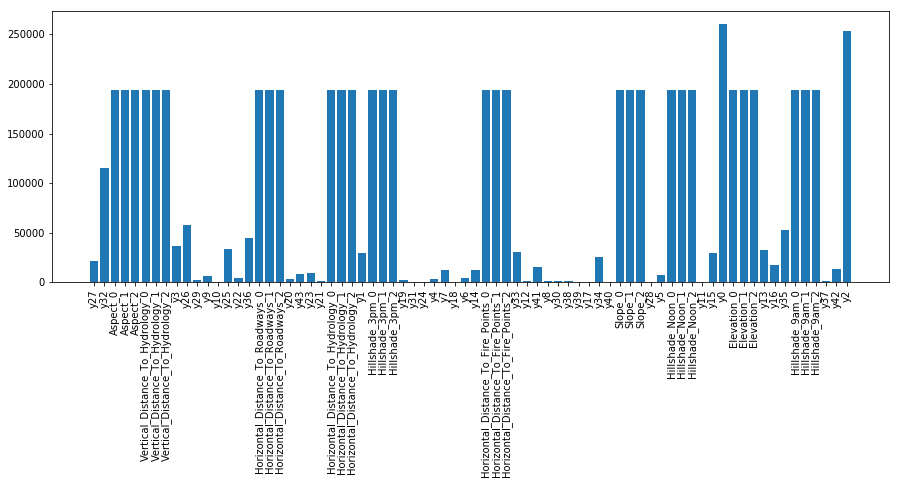

In [30]:
mp = {}
for col in list(dummified_df): mp[col] = (dummified_df[col] == 1).sum()
keys = list(mp.keys())
freqs = list(mp.values())
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(freqs)), freqs)
_ = plt.xticks(np.arange(len(freqs)), keys, rotation='vertical')

In [ ]:
minpatterns = 100
min_support = 0.45
assoc = {}

while min_support > 0:
    min_support *= 0.99

    frequent_itemsets = apriori(dummified_df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
    rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
    res = rules[(rules['antecedent_len']>=3)]
    assoc[min_support] = len(res)
    if len(res) >= minpatterns:
        break

print(f'Min support: {min_support}')
plt.figure()
plt.plot(assoc.keys(), assoc.values())
plt.xlabel('min support')
plt.ylabel('number of found patterns')
plt.show()
res

## Clustering

In [79]:
from sklearn import datasets, metrics, cluster, mixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import contingency_matrix

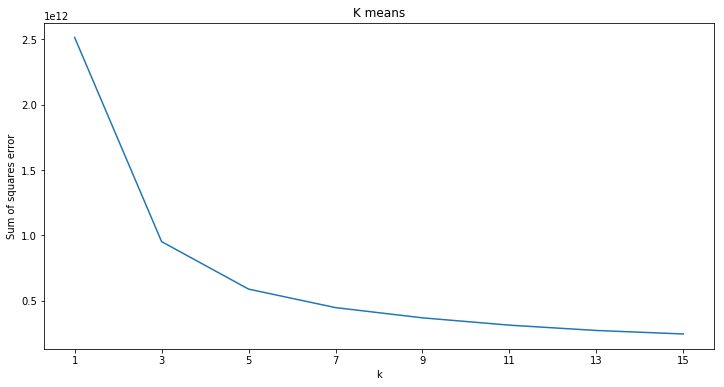

In [81]:
errors = {'Sum of squares': []}
ks = list(range(1, 16, 2))
for k in ks:
    X = data.loc[:, ~data.columns.isin(['class'])]
    kmeans_model = cluster.KMeans(n_clusters=k, random_state=1).fit(X)
    errors['Sum of squares'].append(kmeans_model.inertia_)

plt.figure(figsize=(12, 6))
plt.xticks(ks)
func.multiple_line_chart(plt.gca(), ks, errors, 'K means', 'k', 'Sum of squares error', plot_legend=False)

* According to the elbow method the best number of clusters is 3

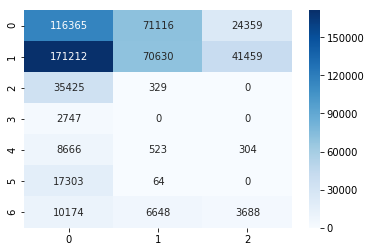

In [82]:
kmeans_model = cluster.KMeans(n_clusters=3, random_state=1).fit(data.loc[:, ~data.columns.isin(['class'])])
matrix = contingency_matrix(data['class'].values, kmeans_model.labels_)
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', square=False)

In [87]:
from tqdm import tqdm_notebook as tqdm
from scipy import arange

In [ ]:
distances = ['cityblock', 'l1', 'l2', 'manhattan']
epss = arange(0.1, 0.5, 0.1)
print(epss)

performance = {}
for d in distances:
    performance[d] = []
    for e in tqdm(epss):
        X = data.loc[:, ~data.columns.isin(['class'])]
        db = DBSCAN(eps=e, min_samples=2, metric=d)
        labels = db.fit_predict(X)
        performance[d].append(metrics.silhouette_score(X, labels))

plt.figure(figsize=(12, 6))
# plt.xticks(epss)
func.multiple_line_chart(plt.gca(), epss, performance, 'DBSCAN', 'eps', 'Silhouette score', plot_legend=True)
plt.show()

In [ ]:
data.head()

In [ ]:
db = DBSCAN(eps=90, min_samples=2, metric='l2')
labels = db.fit_predict(data.loc[:, ~data.columns.isin(['class'])])
matrix = contingency_matrix(data['class'].values, labels)
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', square=False)

## clustering visualization

In [91]:
from sklearn.decomposition import PCA

In [92]:
pca = PCA(n_components=2)
pca.fit(data.loc[:, ~data.columns.isin(['class'])])

print("Components (eigenvectors):\n",pca.components_)
print("Explained variance (eigenvalues) =",pca.explained_variance_)
print("Explained variance (ratio) =",pca.explained_variance_ratio_)

X_pca = pca.transform(X)
print(X_pca.shape)

Components (eigenvectors):
 [[ 5.89956987e-02 -1.66157878e-03 -1.09471860e-03  1.02761186e-02
  -2.18199897e-03  8.48814334e-01  1.30432088e-03  2.02878084e-03
   1.44341855e-03  5.25272761e-01  1.50529307e-04 -1.86553873e-05
  -8.64997654e-05 -4.53741547e-05 -4.15402365e-06 -6.96076696e-06
  -5.33968851e-06 -8.74650210e-06 -2.19395339e-06 -7.66392405e-06
   2.17288752e-07  3.48478601e-07 -1.34981489e-06 -2.98669048e-05
  -8.24116963e-06  1.94355151e-05 -8.18505628e-06 -7.73092372e-07
  -4.79723269e-09  1.80553170e-06 -2.28666939e-06  1.07380295e-07
   2.76947004e-06  6.53409293e-06 -4.80307336e-07  3.85339388e-06
  -2.63439668e-06 -2.39374030e-06 -2.03199830e-07  4.20809876e-07
   4.95208191e-08 -7.94899393e-07  7.73986322e-05  1.08015356e-05
  -8.79191499e-06 -1.77435901e-05 -1.39440979e-05 -2.86069609e-07
  -5.28964766e-08  1.51966728e-08  1.98041488e-07  5.38328392e-06
   2.42530709e-06  1.32799680e-06]
 [-2.95891650e-02 -1.22193427e-02 -1.72930314e-04 -5.12656923e-04
  -1.83678771

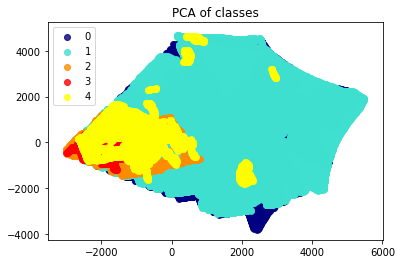

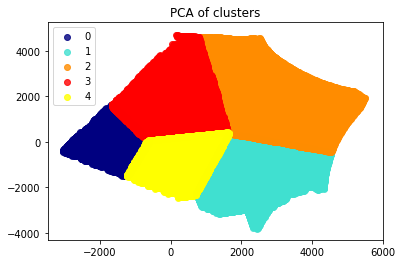

In [95]:
colors = ['navy', 'turquoise', 'darkorange', 'red', 'yellow']

for l, col in zip(set(data['class'].values), colors):
    plt.scatter(X_pca[data['class'] == l, 0],X_pca[data['class'] == l, 1], alpha=.8,color=col, label=str(l))
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of classes')
plt.show()


kmeans_model = cluster.KMeans(n_clusters=5, random_state=1).fit(data.loc[:, ~data.columns.isin(['class'])])
for l, col in zip(set(data['class'].values), colors):
    plt.scatter(X_pca[kmeans_model.labels_ == l, 0],X_pca[kmeans_model.labels_ == l, 1], alpha=.8,color=col, label=str(l))
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of clusters')
plt.show()

## PCA

In [96]:
data.loc[:, ~data.columns.isin(['class'])]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33,y34,y35,y36,y37,y38,y39,y40,y41,y42,y43
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


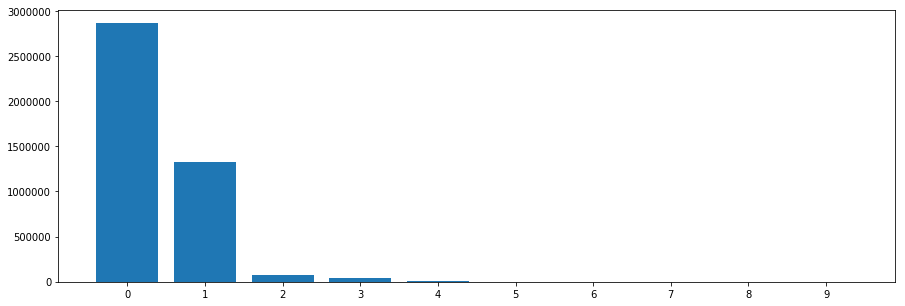

In [97]:
pca = PCA(n_components=10)
pca.fit(data.loc[:, ~data.columns.isin(['class'])])

x = pca.explained_variance_
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(x)), x)
_ = plt.xticks(np.arange(len(x)), np.arange(len(x)))